In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

In [2]:
# VARIABILI
csvfile = '../csv/alldata.csv'
distance_param = 'CDistance'

In [3]:
tragitti = pd.read_csv(csvfile, index_col=False)

In [4]:
# PULIZIA DATI
pre_lock_cond = (tragitti['Month'] == 3) & (tragitti['Day'] < 13)
post_lock_cond = ((tragitti['Month'] == 5) & (tragitti['Day'] >= 4)) | (tragitti['Month'] > 5)

distance_cond = tragitti[distance_param] != 0

moovit_cond = tragitti['Public'] > 12
public_cond = tragitti['Public'] != 0
bike_cond = tragitti['Bike'] != 0
foot_cond = tragitti['Foot'] != 0
car_cond = tragitti['Car'] != 0
car2go_cond = tragitti['Car2Go'] != 0
enjoy_cond = tragitti['Enjoy'] != 0

coherence_cond = (tragitti['Car'] <= tragitti['Car2Go']) & (tragitti['Car'] <= tragitti['Enjoy'])

cleaned = distance_cond & public_cond & bike_cond & foot_cond & car_cond & car2go_cond & enjoy_cond & coherence_cond

In [5]:
# Velocita' media durante il giorno
def vmedia_giorno(df, mezzo):
    ore = range(7, 24)
    vmedia_giorno_ore = []
    for ora in ore:
        tragitti_fascia_oraria = df[df['Hour'] == ora]
        velocita_media_oraria = (tragitti_fascia_oraria[distance_param] * 60.) / tragitti_fascia_oraria[mezzo]
        vmedia_giorno_ore.append(velocita_media_oraria.mean())
    return vmedia_giorno_ore
    
def vmedia_week_plot(df, mezzo):
    week_cond = (df['Day'] >= 2) & (df['Day'] <= 6)
    weekend_cond = (df['Day'] >= 7) & (df['Day'] <= 8)
    
    lst = [
        vmedia_giorno(df[week_cond], mezzo),
        vmedia_giorno(df[weekend_cond], mezzo)]
    array = np.array(lst).T
    
    df = pd.DataFrame(array, index=range(7,24), columns=['Lun-Ven', 'Sab-Dom']).round(2)
    df.plot(marker='o', legend=True)
    plt.xticks(np.arange(7, 24, 1))
    plt.xlabel('orario [h]')
    plt.ylabel('v.media ' + mezzo + ' [km/h]')
    plt.show()

In [6]:
cond = post_lock_cond & distance_cond

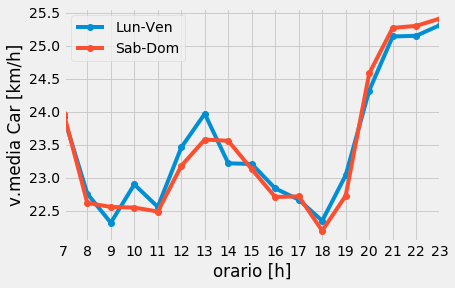

In [7]:
vmedia_week_plot(tragitti[cond & car_cond], 'Car')

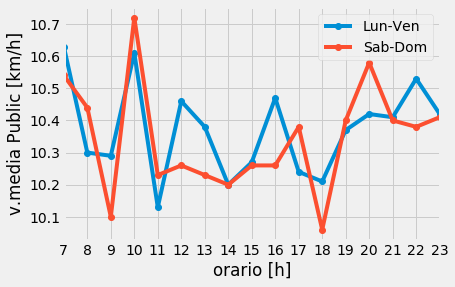

In [8]:
vmedia_week_plot(tragitti[cond & public_cond], 'Public')

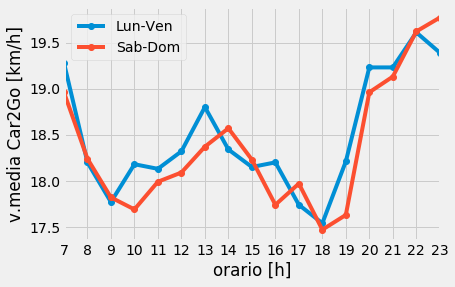

In [9]:
vmedia_week_plot(tragitti[cond & car_cond & car2go_cond & coherence_cond], 'Car2Go')

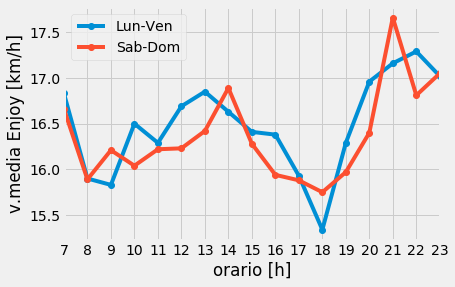

In [10]:
vmedia_week_plot(tragitti[cond & car_cond & enjoy_cond & coherence_cond], 'Enjoy')

In [11]:
def anova(groups):
    all_elements = pd.concat(groups)
    
    sum_total = sum((all_elements - all_elements.mean())**2)
    sum_within = sum([sum((g - g.mean())**2) for g in groups])
    
    sum_between = sum([len(g) * (g.mean()-all_elements.mean())**2 for g in groups])
    assert(np.abs(sum_total - sum_within - sum_between) < 10**-5)
    n = len(all_elements)
    total_var = sum_total / float(n-1)
    within_var = sum_within / float(n-len(groups))
    
    return (total_var, within_var*(n-len(groups))/(n-1))

In [12]:
def list_of_list(df):
    l = []
    for h in range(7, 24):
        l.append(df[cond & (df['Hour'] == h)]['CDistance'])
    return l

In [13]:
anova(list_of_list(tragitti))

(3.0939677045281622, 3.0929330324719979)

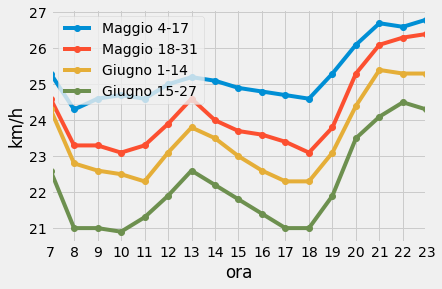

In [14]:
lst = [
    vmedia_giorno(tragitti[(tragitti['Month'] == 5) & tragitti['Day'].between(4, 18) & cond & car_cond], 'Car'),
    vmedia_giorno(tragitti[(tragitti['Month'] == 5) & tragitti['Day'].between(18, 31) & cond & car_cond], 'Car'),
    vmedia_giorno(tragitti[(tragitti['Month'] == 6) & tragitti['Day'].between(1, 15) & cond & car_cond], 'Car'),
    vmedia_giorno(tragitti[(tragitti['Month'] == 6) & tragitti['Day'].between(15, 27) & cond & car_cond], 'Car')]

array = np.array(lst).T

confronto_vmedie_week_by_week = pd.DataFrame(
    array,
    index=range(7,24),
    columns=['Maggio 4-17', 'Maggio 18-31', 'Giugno 1-14', 'Giugno 15-27']).round(decimals=1)

confronto_vmedie_week_by_week.plot(marker='o')
plt.xlabel('ora')
plt.ylabel('km/h')
plt.xticks(range(7,24,1))
plt.show()

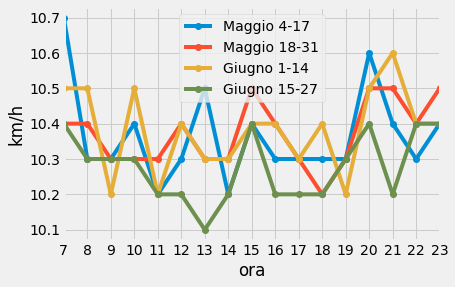

In [15]:
lst = [
    vmedia_giorno(tragitti[(tragitti['Month'] == 5) & tragitti['Day'].between(4, 18) & cond & public_cond], 'Public'),
    vmedia_giorno(tragitti[(tragitti['Month'] == 5) & tragitti['Day'].between(18, 31) & cond & public_cond], 'Public'),
    vmedia_giorno(tragitti[(tragitti['Month'] == 6) & tragitti['Day'].between(1, 15) & cond & public_cond], 'Public'),
    vmedia_giorno(tragitti[(tragitti['Month'] == 6) & tragitti['Day'].between(15, 27) & cond & public_cond], 'Public')]

array = np.array(lst).T

confronto_vmedie_week_by_week = pd.DataFrame(
    array,
    index=range(7,24),
    columns=['Maggio 4-17', 'Maggio 18-31', 'Giugno 1-14', 'Giugno 15-27']).round(decimals=1)

confronto_vmedie_week_by_week.plot(marker='o')
plt.xlabel('ora')
plt.ylabel('km/h')
plt.xticks(range(7,24,1))
plt.show()

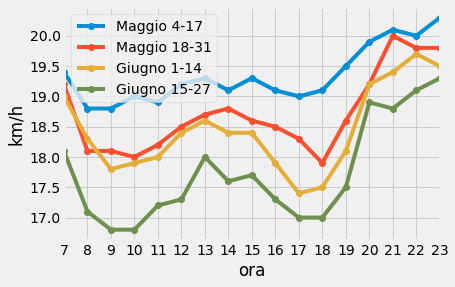

In [16]:
lst = [
    vmedia_giorno(tragitti[(tragitti['Month'] == 5) & tragitti['Day'].between(4, 18) & cond & car_cond & car2go_cond & coherence_cond], 'Car2Go'),
    vmedia_giorno(tragitti[(tragitti['Month'] == 5) & tragitti['Day'].between(18, 31) & cond & car_cond & car2go_cond & coherence_cond], 'Car2Go'),
    vmedia_giorno(tragitti[(tragitti['Month'] == 6) & tragitti['Day'].between(1, 15) & cond & car_cond & car2go_cond & coherence_cond], 'Car2Go'),
    vmedia_giorno(tragitti[(tragitti['Month'] == 6) & tragitti['Day'].between(15, 27) & cond & car_cond & car2go_cond & coherence_cond], 'Car2Go')]

array = np.array(lst).T

confronto_vmedie_week_by_week = pd.DataFrame(
    array,
    index=range(7,24),
    columns=['Maggio 4-17', 'Maggio 18-31', 'Giugno 1-14', 'Giugno 15-27']).round(decimals=1)

confronto_vmedie_week_by_week.plot(marker='o')
plt.xlabel('ora')
plt.ylabel('km/h')
plt.xticks(range(7,24,1))
plt.show()

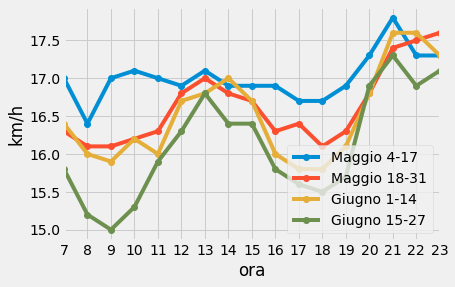

In [17]:
lst = [
    vmedia_giorno(tragitti[(tragitti['Month'] == 5) & tragitti['Day'].between(4, 18) & cond & car_cond & enjoy_cond & coherence_cond], 'Enjoy'),
    vmedia_giorno(tragitti[(tragitti['Month'] == 5) & tragitti['Day'].between(18, 31) & cond & car_cond & enjoy_cond & coherence_cond], 'Enjoy'),
    vmedia_giorno(tragitti[(tragitti['Month'] == 6) & tragitti['Day'].between(1, 15) & cond & car_cond & enjoy_cond & coherence_cond], 'Enjoy'),
    vmedia_giorno(tragitti[(tragitti['Month'] == 6) & tragitti['Day'].between(15, 27) & cond & car_cond & enjoy_cond & coherence_cond], 'Enjoy')]

array = np.array(lst).T

confronto_vmedie_week_by_week = pd.DataFrame(
    array,
    index=range(7,24),
    columns=['Maggio 4-17', 'Maggio 18-31', 'Giugno 1-14', 'Giugno 15-27']).round(decimals=1)

confronto_vmedie_week_by_week.plot(marker='o')
plt.xlabel('ora')
plt.ylabel('km/h')
plt.xticks(range(7,24,1))
plt.show()